<a href="https://colab.research.google.com/github/slp22/deep-learning-project/blob/main/dl_diabetic_retinopathy_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Deep Learning | MVP

# Diabetic Retinopathy<a id='top'></a> 

## **Analysis Goal**  
The client, ...

**RQ:** ? 

## **Process**
**Data source:** 


**Models:** 


## **Preliminary Conclusions**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import tensorflow as tf
import zipfile
print("TensorFlow version:", tf.__version__)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from PIL import Image

# import seaborn as sns
pd.set_option('display.max_colwidth', None)
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']  # or svg
# sns.set(context='notebook', style='whitegrid')

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.model_selection import train_test_split


TensorFlow version: 2.8.2
Pandas version: 1.3.5
Numpy version: 1.21.6


## 1 | Dataset: [Diabetic Retinopathy Retinal Images](https://www.kaggle.com/datasets/sachinkumar413/diabetic-retinopathy-preprocessed-dataset)<a id='1'></a>  

In [17]:
# unzip raw data file from Google Drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/DR_raw_data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

Healthy Eye
type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


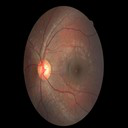

In [42]:
# import one healthy image

path = '/tmp/raw-data/No DR/No DR.jpg'

healthy_image = tf.keras.preprocessing.image.load_img(
   path)
  #  grayscale=False, 
  #  color_mode="rgb", 
  #  target_size=(256, 256), 
  #  interpolation="nearest")
print('Healthy Eye')
print('type:', type(healthy_image))
healthy_image 


Severe Diabetic Retinopthy
type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


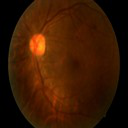

In [43]:
# import one severe DR image

path = '/tmp/raw-data/Severe DR/Severe DR.jpg'

severe_image = tf.keras.preprocessing.image.load_img(
   path)
  #  grayscale=False, 
  #  color_mode="rgb", 
  #  target_size=(256, 256), 
  #  interpolation="nearest")

print('Severe Diabetic Retinopthy')
print('type:', type(severe_image))
severe_image 


After EDA, import images ...

In [40]:
# read in all images
# https://keras.io/api/preprocessing/image/

directory = '/tmp/raw-data'
data = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True)

print('type:', type(data), '\n')

data

Found 13970 files belonging to 5 classes.
type: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'> 



<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [49]:
# https://www.tensorflow.org/jvm/api_docs/java/org/tensorflow/op/data/BatchDataset

# convert healthy_image to numpy array

img = healthy_image
healthy_image_array = tf.keras.preprocessing.image.img_to_array(img, 
                                                                data_format=None, 
                                                                dtype=None)
print('type:', type(healthy_image_array))
healthy_image_array

type: <class 'numpy.ndarray'>


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

## 2 | Exploratory Data Analysis<a id='2'></a>  

### Data Selection <a id='2'></a>  

In [ ]:
# pickle


### Preprocessing<a id='tp'></a>  

In [ ]:
# read in pickle
